In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

In [2]:
SEED = 77

# preprocessing: scaling the data and split dataset
data = pd.read_csv("../winequality.csv")
predictors = data[data.columns.difference(["label"])]
scaler = MinMaxScaler()
predictors_scaled = scaler.fit_transform(predictors)
target = data[["label"]].values.ravel()

train_X, test_X, train_y, test_y = train_test_split(predictors_scaled, target, train_size=0.8, random_state=SEED, stratify=target)

In [4]:
svd = TruncatedSVD(n_components=8, random_state=SEED)
svd.fit(train_X)
data = svd.transform(train_X)
label = train_y

In [5]:
# Choosing the optimal k with two metrics - one is inertia, another is Silhouette Coefficient
k_grid = np.arange(1, 11)
loss1 = np.zeros(k_grid.size)
loss2 = np.zeros(k_grid.size)
for idx, k in enumerate(k_grid):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=SEED)
    kmeans.fit(data)
    loss1[idx] = kmeans.inertia_
    if k > 1:
        loss2[idx] = silhouette_score(data, kmeans.labels_)

k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10


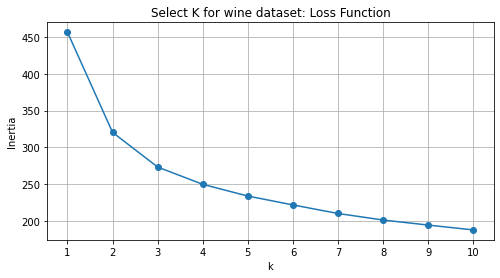

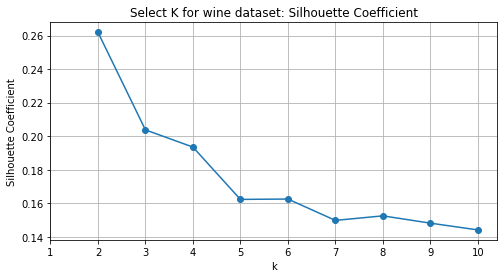

In [6]:
import matplotlib.pyplot as plt
# Plot loss vs k to find best k
plt.figure(figsize=(8,4))
plt.plot(k_grid, loss1,'-o')
plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Select K for wine dataset: Loss Function')
plt.grid()
# plt.savefig('../plots/kmeans_wine_loss_1.png', dpi=300)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(k_grid[1:], loss2[1:], marker='o')
plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.title('Select K for wine dataset: Silhouette Coefficient')
plt.grid()
# plt.savefig('../plots/kmeans_wine_loss_2.png', dpi=300)
plt.show()

In [7]:
kmeans = KMeans(n_clusters=2, random_state=SEED)
kmeans.fit(data)

print(silhouette_score(data, kmeans.labels_))
print(completeness_score(label, kmeans.labels_), homogeneity_score(label, kmeans.labels_))
print(accuracy_score(label, kmeans.labels_))

0.26196512356638274
0.08250461911381497 0.08272081101248718
0.33345246604717654
